In [130]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## https://www.youtube.com/watch?v=eLTLtUVuuy4 as reference

In [208]:
def canny(image):
    gray=cv2.cvtColor(lane_image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur, 50, 400)
    return canny

In [202]:
def region_of_interest1(image):
    height=image.shape[0]
    polygons = np.array([[(0, 570), (750, 300), (450, 700)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

In [214]:
def region_of_interest2(image):
    height=image.shape[0]
    polygons = np.array([[(1280, 720), (1280, 450), (600, 300)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

In [220]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (0,255,0), 10)
    return line_image

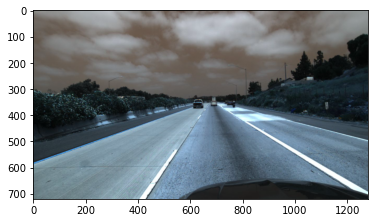

In [231]:
plt.imshow(image)

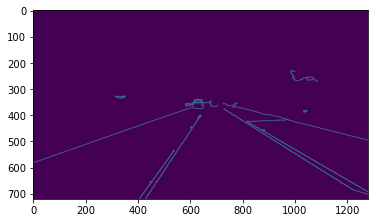

In [209]:
image = cv2.imread('1.jpg')
lane_image = np.copy(image)

canny = canny(lane_image)
plt.imshow(canny)

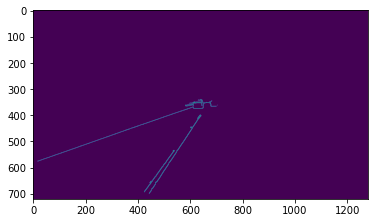

In [205]:
cropped_image1 = region_of_interest1(canny)
plt.imshow(region_of_interest1(canny))
plt.show()

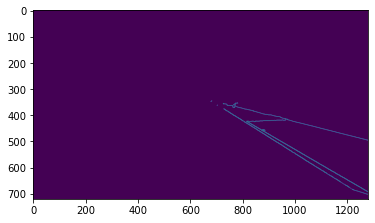

In [215]:
cropped_image2 = region_of_interest2(canny)
plt.imshow(region_of_interest2(canny))
plt.show()

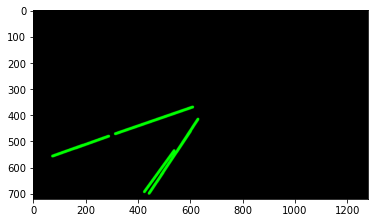

In [225]:
# finding lane lines - Hough space
lines1 = cv2.HoughLinesP(cropped_image1, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
line_image1 = display_lines(lane_image, lines1)
plt.imshow(line_image1)

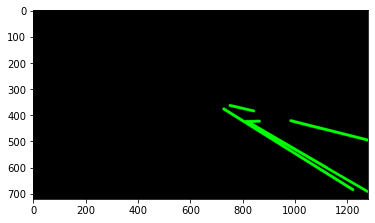

In [230]:
# finding lane lines - Hough space
lines2 = cv2.HoughLinesP(cropped_image2, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=8)
line_image2 = display_lines(lane_image, lines2)
plt.imshow(line_image2)

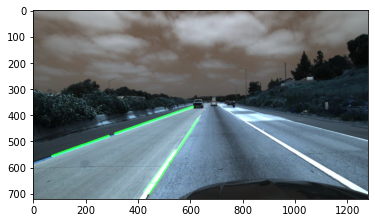

In [227]:
comb_image1 = cv2.addWeighted(line_image1, 0.8, lane_image, 1, 1)
plt.imshow(comb_image1)

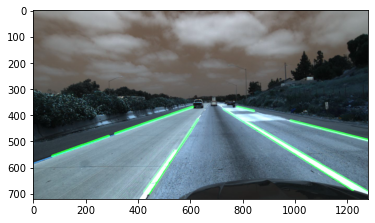

In [228]:
comb_image2 = cv2.addWeighted(line_image2, 0.8, comb_image1, 1, 1)
plt.imshow(comb_image2)